# Playing with a qubit on a PewPew

## Introduction to the PewPew

The [PewPew](https://pewpew.readthedocs.io/en/latest/) is a handheld games console with 6 buttons and 64 pixels. It provides a perfect environment for people to get their first taste of programming or game design. In this workshop we will also use it to get people started with quantum computing.

### How to run PewPew programs

Every code cell in this notebook that begins with `import pew` is a standalone program. To run them, pick one of the following three options.

* Run on an actual PewPew by connecting it to your computer, and then copying the program into the `main.py` file on the device.

* Run it in conjugation with the Pygame-based emulator for the PewPew.  You can do this by using a web-hosted service such as [this one](https://repl.it/@quantum_jim/pewpewtutorials) (Note that this is an external site, unaffiliated with Qiskit or IBM). You could also download all the files there, copy programs into the `main.py` file and run them on your own computer.

* Run the cells in this notebook on your own computer to use a Matplotlib-based emulator. You'll first need to open and run [this notebook](controller.ipynb) to get the controller, and use both notebooks at the same time.

If you are using the third option, start by firing up the matplotlib magic.

In [ ]:
%matplotlib notebook

### Your first PewPew program

Let's start with the most minimal example of a program for the PewPew. We will simply light up one of the pixels. This is done with the command `screen.pixel(X,Y,B)`, where `X` and `Y` are the coordinates of the pixel (each a number from 0 to 7) and `B` is the brightness (0 for off, and then 1, 2 and 3 from dim to bright).

Here is a program that lights up the pixel at position X=6, Y=6 with maximum brightness, and sets the rest to a medium brightness.

In [ ]:
import pew # setting up tools for the pewpew

pew.init() # initialize the game engine...
screen = pew.Pix() # ...and the screen

# fill the screen with medium brightness pixels
for X in range(8):
    for Y in range(8):
        screen.pixel(X,Y,2)

B = 3 # set brightness
screen.pixel(6,6,B) # put a bright pixel at (6,6)

pew.show(screen) # update screen to display the above changes

pew.tick(5) # pause for 5 seconds before quitting

The PewPew's buttons allow you to interact with what is happening on screen. To implement this, we need a loop to allow the program to keep periodically checking for input.

The input is described by `keys=pew.keys()`, which takes certain values depending on which button is being pressed. Pressing 'Up' gives the value described by `pew.K_UP`, and so on. Pressing multiple buttons will give a value that describes the combination. To filter out whether a given button is pressed we therefore use Python's `&` operation, such as `keys&pew.K_UP` to check for 'Up'.

Using this information, we can construct `if`-`else` statements to control what the program does when a button is pressed. We'll simply use the 'Up' button (up arrow on a keyboard) to control whether the pixel at (6,6) is on or not.

In [ ]:
import pew # setting up tools for the pewpew

pew.init() # initialize the game engine...
screen = pew.Pix() # ...and the screen

# fill the screen with medium brightness pixels
for X in range(8):
    for Y in range(8):
        screen.pixel(X,Y,2)
        
B = 3 # set initial brightness

while True: # loop which checks for user input and responds

    keys = pew.keys() # get current key presses
    if keys!=0:
        if keys&pew.K_X: # pressing X turns off the program
            break
        if keys&pew.K_UP: # if UP is pressed, increase brightness of pixel at at (6,6)
            B = min(B+1,3)
        if keys&pew.K_DOWN: # if DOWN is pressed, decrease brightness of pixel at at (6,6)
            B = max(B-1,0)

            
    screen.pixel(6,6,B) # put a pixel at (6,6) with current brightness

    pew.show(screen) # update screen to display the above changes

    pew.tick(1/6) # pause for a sixth of a second

## Introduction to MicroQiskit

Qiskit is the largest, most feature rich and most well developed framework for quantum computing. This is obviously a good thing in general, but it can be overwhelming for those getting started.

For that reason, we have created MicroQiskit: the smallest, least feature rich and least developed framework for quantum computing! It has everything you need to get to know single and two qubit circuits, and do so with the same syntax as Qiskit. By mastering MicroQiskit, you'll be well on your way to mastering Qiskit.

MicroQiskit has also been designed to be able to work on microcontroller devices. This includes the PewPew, as well as many other devices used for education and hobbies. It is compatible with MicroPython and CircuitPython, both of which are minimal implementations of Python designed to run on microcontrollers. Many Python packages have minimal versions made to be compatible with these implementations. MicroQiskit is similarly the MicroPython-compatible version of Qiskit.

## Basics of MicroQiskit (and Qiskit)

### Quantum Circuits

The heart of quantum computing is the circuit. In Qiskit and MicroQiskit, our circuit is represented by a Python object, known as the `QuantumCircuit` object. The following line creates such an object, and names it `qc`.

```python
qc = QuantumCircuit(n,n)
```

Here the first `n` is the number of qubits, and the second `n` is the number of output bits. In Qiskit, these can be different numbers in general. However, they are often simply chosen to be equal. MicroQiskit restricts us to this standard case. MicroQiskit also retricts to `n` being either 1 or 2, as it cannot simulate larger numbers of qubits. Many interesting things can be done with just two qubits, so this will not hamper us. However, Qiskit supports any number of qubits.

### Quantum gates

The gates that can be added to a quantum circuit are

```python
qc.x(j)
qc.h(j)
qc.rx(theta,j)
qc.rz(theta,j)
qc.ry(theta,j)
qc.cx(j,k)
```

Here `j` is the number representing the qubit: `0` for a single qubit circuit, or `0` and `1` for a two qubit circuit.

Other gates are also available in Qiskit. However, since everything can be built out of the basic operations we have here, nothing is lost in MicroQiskit by restricting to them.

### Measurements

Measurement is the process of extracting an output from a qubit. These outputs take the form of normal bits. There are an infinite number of ways we can choose to do this, but normally we stick to just three. The most common is the *z measurement*, which is performed using the command

```python
# x measurement of qubit j
qc.measure(j,j)
```

This measures qubit `j` and places the result in output bit `j`. In Qiskit, these two arguments do not neccessarily need to be equal: the labelling of a qubit and the bit used for its output can be different. However, they are often chosen to be the same. MicroQiskit only supports this standard case, so the two arguments must be equal.

The other standard forms of measurement are the *x measurement*, which is performed using

```python
# x measurement of qubit j
qc.h(j)
qc.measure(j,j)
```

and the *y measurement*

```python
# y measurement of qubit j
qc.rx(pi/2,j)
qc.measure(j,j)
```

Measurements in Qiskit can be placed at any point in the circuit. The simulators of Qiskit will quite happily run such quantum programs. However, when running on current prototype quantum hardware, the only supported case is to have all measurements made at the very end. This is also only case supported by MicroQiskit, so no gates for a given qubit should be placed after its measurement.



### Simulating a Circuit

In standard Qiskit, circuits can be run on various simulators as well as real quantum devices.

Yes! That's what I said! Real prototype quantum processes are sitting on the cloud, waiting for you to experiment with. It's free and available to all. Check it out [here](https://quantum-computing.ibm.com/).

Since there are many ways to run a quantum circuit with Qiskit, the procedure for running circuits and extracting results in Qiskit is designed to handle all these various use cases.

In MicroQiskit, there is only one way to run a circuit: to simulate it on the MicroQiskit simulator. For this reason, running circuits is slightly easier in MicroQiskit. The process is implemented by a single function, called `simulate()`. This has an argument `shots`, which determines how many times you wish to repeatedly run the circuit to extract statistics. It also has an argument `get` which determines the form in which the results are given.

For example, to get a list of `shots=5` output bit strings, use

```python
m = simulate(qc,shots=5,get='memory')
```

The result will look something like `m = ['11','00','01','01','00']`.

To get a dictionary detailing how many of `shots=1024` samples result in each output, use

```python
c = simulate(qc,shots=1024,get='counts')
```

The result will look something like `c = {'00':240,'01':275,'10':212,'11':299}`.

To get a state vector describing the state at output, no measurement gates or output bits are required. You are therefore able to initialize the circuit with

```python
qc = QuantumCircuit(n)
```

The state vector is extracted with

```python
state = simulate(qc,shots=1024,get='statevector')
```

The Qiskit equivalents of the commands listed above are very similar to their MicroQiskit counterparts. Specifically, they are

```python
m = execute(qc,shots=5).result().get_memory()
c = execute(qc,shots=1024).result().get_counts()
state = execute(qc,shots=1024).result().get_statevector()
```

Note also that the format for complex numbers in the statevector is different in MicroQiskit. A complex number of the form $a + i b$ is represented by the list `[a,b]` in MicroQiskit, rather than `a + bj` as in Qiskit. A statevector composed only of real numbers can be initialized with a list of real numbers as normal.




## A Qubit on the PewPew

We will now use our quantum tools on the PewPew. To do this, take the file named 'MicroQiskit.py', included in this folder, and place it on your PewPew. You will then be able to run the program below. If you are running an emulator on your own device, make sure that 'MicroQiskit.py' is in the same folder as the 'Pew.py' file.

The following program shows a simple example of using MicroQiskit. Two circuits are created

```python
qc = QuantumCircuit(1,1)
```

and

```python
m_z = QuantumCircuit(1,1)
m_z.measure(0,0)
```

The first is the main circuit that will hold our quantum program. The second simply provides the measurement needed at the end. The final circuit that is run is `qc+m_z`, which corresponds to the contents of `qc`, following by those of `m_z`.

The end result of the circuit is used to set the brightness of the pixel at (6,6), with it going dark for the output `0`, and bright for `1`.

The 'Up' and 'Down' buttons can be used to add gates to `qc`. The 'Up' button is used for `x`. This acts like a classical NOT gate by flipping between `0` and `1`. The 'Down' button adds `h`, a gate which will need a little explanation. But first, experiment for yourself.

In [ ]:
import pew # setting up tools for the pewpew
from microqiskit import QuantumCircuit, simulate # setting up tools for quantum

pew.init() # initialize the game engine...
screen = pew.Pix() # ...and the screen

# fill the screen with dim pixels
for X in range(8):
    for Y in range(8):
        screen.pixel(X,Y,2)
        
pew.show(screen) # update screen to display the above changes

qc = QuantumCircuit(1,1) # create an empty single qubit circuit

# create a circuit that measures the qubit in the z basis
m_z = QuantumCircuit(1,1)
m_z.measure(0,0)

while True: # loop which checks for user input and responds

    keys = pew.keys() # get current key presses
    if keys!=0:
        if keys&pew.K_X: # pressing X turns off the program
            break
        if keys&pew.K_UP: # if UP is pressed, add an x gate
            qc.x(0)
        if keys&pew.K_DOWN: # if DOWN is pressed, add an h gate
            qc.h(0) 
     
    # get the output from the current circuit
    full_circuit = qc + m_z
    bit = simulate(full_circuit,shots=1,get='memory')[0]
    
    # set the brightness of 6,6 according to the output
    if bit=='1':
        B = 3
    else:
        B = 0  
    
    screen.pixel(6,6,B) # put a pixel at (6,1) with current brightness

    pew.show(screen) # update screen to display the above changes

    pew.tick(1/6) # pause for a sixth of a second

If you start with a qubit that is certain to output `0`, and then apply an `h`, you get a random result. But apply it again, and you are back to a certain `0`. Similarly, if you start with a certain output of `1`, a single `h` creates randomness. But another `h` gets you back to `1`.

This shows us something important about `h`. Though it seems to create randomness, it does not do it in the same way as a dice roll or coin flip. The information about the initial state is not forgotten. It is just moved somewhere. But where?

To answer this question, we'll use 'O' to change between making a z mesurement, and making an x measurement. The outcome for an x measurement will then be display on pixel (1,1).

In [ ]:
import pew # setting up tools for the pewpew
from microqiskit import QuantumCircuit, simulate # setting up tools for quantum
from math import pi

pew.init() # initialize the game engine...
screen = pew.Pix() # ...and the screen

# fill the screen with dim pixels
for X in range(8):
    for Y in range(8):
        screen.pixel(X,Y,2)
        
pew.show(screen) # update screen to display the above changes

qc = QuantumCircuit(1,1) # create an empty single qubit circuit

# create a circuit that measures the qubit in the z basis
m_z = QuantumCircuit(1,1)
m_z.measure(0,0)

# create a circuit that measures the qubit in the x basis
m_x = QuantumCircuit(1,1)
m_x.h(0)
m_x.measure(0,0)

basis = 'z' # set initial measurement basis

while True: # loop which checks for user input and responds

    keys = pew.keys() # get current key presses
    if keys!=0:
        if keys&pew.K_X: # pressing X turns off the program
            break
        if keys&pew.K_UP: # if UP is pressed, add an x gate
            qc.x(0)
        if keys&pew.K_DOWN: # if DOWN is pressed, add an h gate
            qc.h(0) 
        if keys&pew.K_O:
            basis = (basis=='z')*'x' + (basis=='x')*'z'
     
    # get the output from the current circuit
    if basis=='z':
        full_circuit = qc + m_z
    elif basis=='x':
        full_circuit = qc + m_x
    bit = simulate(full_circuit,shots=1,get='memory')[0]
    
    # set the brightness of 6,6 according to the output
    if bit=='1':
        B = 3
    else:
        B = 0
    if basis=='z':
        screen.pixel(6,6,B)
        screen.pixel(1,1,2)
    elif basis=='x':
        screen.pixel(6,6,2)
        screen.pixel(1,1,B)

    pew.show(screen) # update screen to display the above changes

    pew.tick(1/6) # pause for a sixth of a second

Whenever the output of a one of these measurements is certain, the output for the other is random. The `h` gate simply swaps information between the two bases.

Let's add in the y measurement too, as well as another gate.

In [ ]:
import pew # setting up tools for the pewpew
from microqiskit import QuantumCircuit, simulate # setting up tools for quantum

pew.init() # initialize the game engine...
screen = pew.Pix() # ...and the screen

# fill the screen with dim pixels
for X in range(8):
    for Y in range(8):
        screen.pixel(X,Y,2)
        
pew.show(screen) # update screen to display the above changes

qc = QuantumCircuit(1,1) # create an empty single qubit circuit

# create a circuit that measures the qubit in the z basis
m_z = QuantumCircuit(1,1)
m_z.measure(0,0)

# create a circuit that measures the qubit in the x basis
m_x = QuantumCircuit(1,1)
m_x.h(0)
m_x.measure(0,0)

# create a circuit that measures the qubit in the y basis
m_y = QuantumCircuit(1,1)
m_y.rx(pi/2,0)
m_y.measure(0,0)

basis = 'z' # set initial measurement basis

while True: # loop which checks for user input and responds

    keys = pew.keys() # get current key presses
    if keys!=0:
        if keys&pew.K_X: # pressing X turns off the program
            break
        if keys&pew.K_UP: # if UP is pressed, add an x gate
            qc.x(0)
        if keys&pew.K_DOWN: # if DOWN is pressed, add an h gate
            qc.h(0)
        if keys&pew.K_LEFT: # if LEFT is pressed, add a sqrt(x) gate
            qc.rx(pi/2,0)
        if keys&pew.K_O:
            basis = (basis=='z')*'x' + (basis=='x')*'y'+ (basis=='y')*'z'
     
    # get the output from the current circuit
    if basis=='z':
        full_circuit = qc + m_z
    elif basis=='x':
        full_circuit = qc + m_x
    elif basis=='y':
        full_circuit = qc + m_y
    bit = simulate(full_circuit,shots=1,get='memory')[0]
    
    # set the brightness of 6,6 according to the output
    if bit=='1':
        B = 3
    else:
        B = 0
    if basis=='z':
        screen.pixel(6,6,B)
        screen.pixel(6,1,2)
        screen.pixel(1,1,2)
    elif basis=='x':
        screen.pixel(6,6,2)
        screen.pixel(6,1,2)
        screen.pixel(1,1,B)
    elif basis=='y':
        screen.pixel(6,6,2)
        screen.pixel(6,1,B)
        screen.pixel(1,1,2)

    pew.show(screen) # update screen to display the above changes

    pew.tick(1/6) # pause for a sixth of a second

The gate on the 'Left' button is `qc.rx(pi/2,0)`. There are two important things to note about its effects.

Firstly, let's look at the effects of applying it once. This allows the output of the y measurement to be certain, and makes the other two random.

With all the gates available, we will find that whenever the output for one measurement type is certain, the others are completely random. The gates allow us change the bit value, move it around.

The reason that qubits behave in this way is that they are quantum objects, and are therefore bound to obey Heisenberg's uncertainty principle.

![]()

Despite the multiple ways to extract a bit from a qubit, a qubit is only able to store a single bit. It has a single bit's worth of certainty that it shares among the x, y and z basis. When one is certain of what that bit is, the others must be completely uncertain.

To explore this gate further, we need to look at the maths behind the single qubit. Fortunately, this is quite simple to visualize. We'll leave the PewPew for a moment, and use some tools from the full version of Qiskit to do this.

In [1]:
from microqiskit import QuantumCircuit, simulate
import qiskit
from qiskit.visualization import plot_bloch_vector
from math import pi

We'll also turn off matplotlib magic.

In [2]:
%matplotlib inline

The following function takes a quantum circuit as input, and then runs it with each of the three types of measurment. The results are then collected in a from that can be plotted using the `plot_bloch_vector` tool from Qiskit.

In [3]:
def get_bloch(qc):
    
    # create a circuit that measures the qubit in the z basis
    m_z = QuantumCircuit(1,1)
    m_z.measure(0,0)

    # create a circuit that measures the qubit in the x basis
    m_x = QuantumCircuit(1,1)
    m_x.h(0)
    m_x.measure(0,0)

    # create a circuit that measures the qubit in the y basis
    m_y = QuantumCircuit(1,1)
    m_y.rx(pi/2,0)
    m_y.measure(0,0)

    shots = 2**14 # number of samples used for statistics

    bloch_vector = []
    # look at each possible measurement
    for measure_circuit in [m_x, m_y, m_z]:

        # run the circuit with a the selected measurement and get the number of samples that output each bit value
        counts = simulate(qc+measure_circuit,shots=shots,get='counts')

        # calculate the probabilities for each bit value
        probs = {}
        for output in ['0','1']:
            if output in counts:
                probs[output] = counts[output]/shots
            else:
                probs[output] = 0

        # the bloch vector needs the different between these values
        bloch_vector.append( probs['0'] -  probs['1'] )
        
    return bloch_vector

Let's first try it out on an empty circuit.

In [4]:
qc = QuantumCircuit(1,1)

Remember that this circuit outputs a `0` with certainty for a z measurement, but is random for the others.

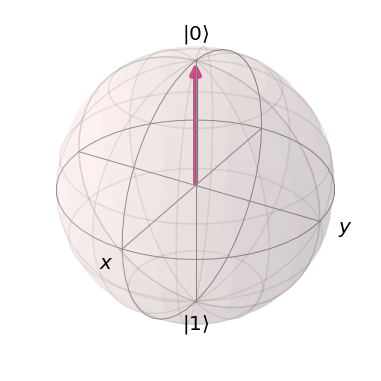

In [5]:
plot_bloch_vector(get_bloch(qc))

The state of the qubit is represented as a point in 3D space. The vertical axis corresponds to the probability of getting a `0` or a `1` for the z measurement. If the qubit is certain to output `0`, as we see here, the point lies at the top of the image.

Now let's see what happens when the z measurement is certain to output `1`.

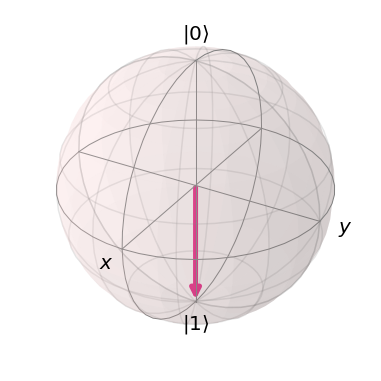

In [6]:
qc = QuantumCircuit(1,1)
qc.x(0)

plot_bloch_vector(get_bloch(qc))

Here the point is at the bottom. So the positions of these completely opposing outcomes are completely opposing points.

We should also mention what is going on with the x and y axes. These correspond to the probability of the outputs for x and y measurements, respectively. Since these outputs are random, with no bias towards `0` or `1`, the points above lie in the middle of these axes.

Now let's look at qubits that are certain of their outputs for the x measurement. First for `0`.

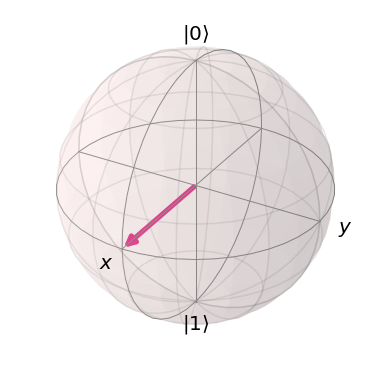

In [7]:
qc = QuantumCircuit(1,1)
qc.h(0)

plot_bloch_vector(get_bloch(qc))

Then for `1`.

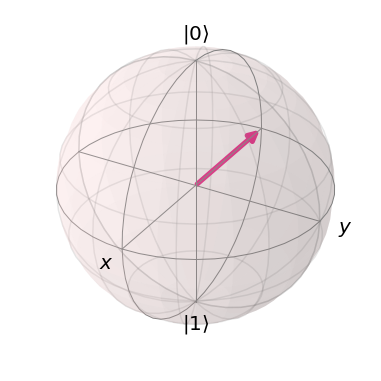

In [8]:
qc = QuantumCircuit(1,1)
qc.x(0)
qc.h(0)

plot_bloch_vector(get_bloch(qc))

Again, the states are represented by opposing points, this time represented as points along the x axis.

The states with certain outcomes for the y measurement will hold no suprises. First `0`

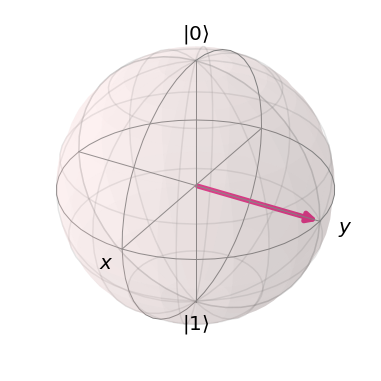

In [9]:
qc = QuantumCircuit(1,1)
qc.rx(-pi/2,0)

plot_bloch_vector(get_bloch(qc))

And then `1`.

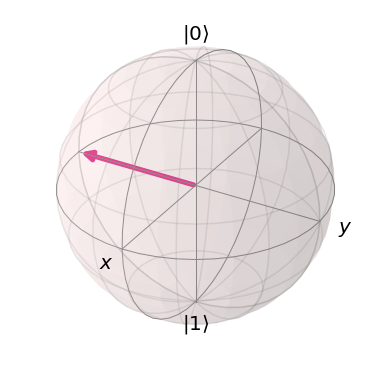

In [10]:
qc = QuantumCircuit(1,1)
qc.rx(pi/2,0)

plot_bloch_vector(get_bloch(qc))

So far we have mapped out six points. Now it's time to see why this visualization uses a sphere. For this we need to use some other gates. Specifically, let's try a few different numbers for the first argument of the `rx` gate.

First, $1/8$ of what is required for an `x`.

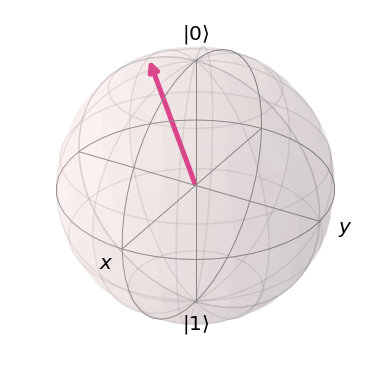

In [11]:
qc = QuantumCircuit(1,1)
qc.rx(pi*1/8,0)
plot_bloch_vector(get_bloch(qc))

Then $2/8$.

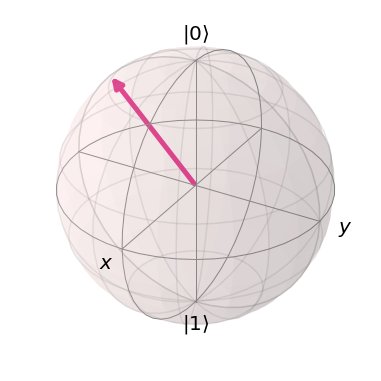

In [12]:
qc = QuantumCircuit(1,1)
qc.rx(pi*2/8,0)
plot_bloch_vector(get_bloch(qc))

Now $3/8$.

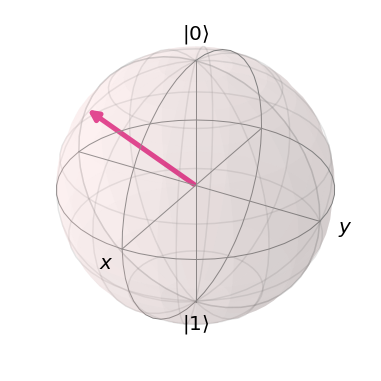

In [13]:
qc = QuantumCircuit(1,1)
qc.rx(pi*3/8,0)
plot_bloch_vector(get_bloch(qc))

And finally $4/8=1/2$.

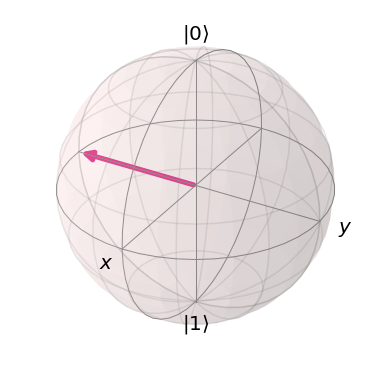

In [14]:
qc = QuantumCircuit(1,1)
qc.rx(pi*4/8,0)
plot_bloch_vector(get_bloch(qc))

With this visualization, the `rx` gate can be understood as a rotation around the `x` axes, expressed in radians. A $\pi$ rotation flips the qubit on its head, flipping `0` to `1` and `1` to `0`, which is the effect we know from the `x` gate. Other angles explore other points along the way, but the qubit state always corresponds to somewhere on the surface of the sphere. This restriction is the form that Heisenberg's uncertainty principle takes for qubits: any point outside of the sphere is too certain of too many things.

All other points on the sphere can also be reached, but this will require the gate `rz` as well. This is for rotations around the z axis. Starting from the same state as above, here is a $\pi/8$ rotation.

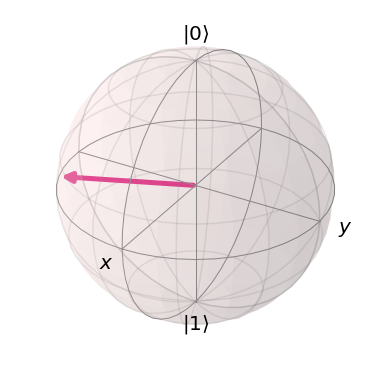

In [15]:
qc = QuantumCircuit(1,1)
qc.rx(pi*4/8,0)
qc.rz(pi*1/8,0)
plot_bloch_vector(get_bloch(qc))

Now we add another $\pi/8$ rotation around the z axis.

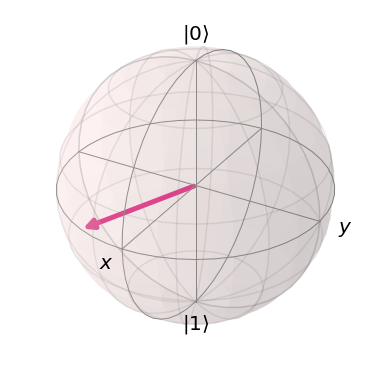

In [16]:
qc.rz(pi*2/8,0)
plot_bloch_vector(get_bloch(qc))

And another.

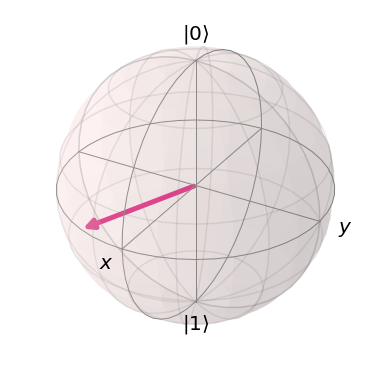

In [17]:
qc = QuantumCircuit(1,1)
qc.rx(pi*4/8,0)
qc.rz(pi*3/8,0)
plot_bloch_vector(get_bloch(qc))

And another.

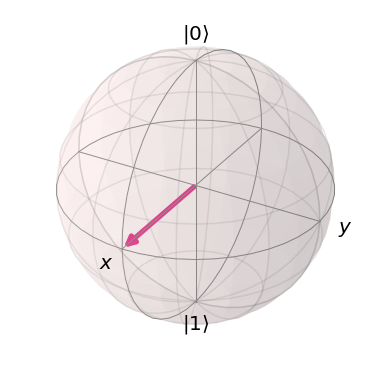

In [18]:
qc = QuantumCircuit(1,1)
qc.rx(pi*4/8,0)
qc.rz(pi*4/8,0)
plot_bloch_vector(get_bloch(qc))

You can similarly use `ry` for rotations around the y axes. Together, the world of the single qubit is under your control.

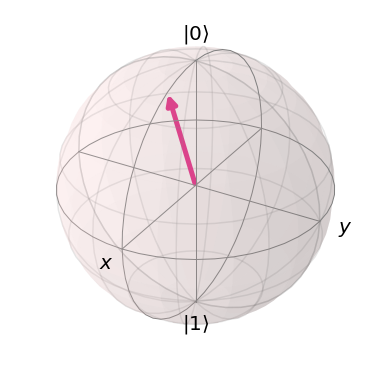

In [19]:
qc = QuantumCircuit(1,1)
qc.ry(pi*1/8,0)
plot_bloch_vector(get_bloch(qc))

To try this for yourself, go to [this website](https://quantum-computing.ibm.com/jupyter), where everything Qiskit is already set up for you. If you don't already have a (free) account, you'll need to sign up first.

You will need to click on the 'New Notebook' button. Then replace the contents of the first cell with the following and run it.

In [22]:
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
# Loading your IBM Q account(s)
provider = IBMQ.load_account()

# Set up tools for visualizing the Bloch sphere
from math import pi
def get_bloch(qc):
    
    # create a circuit that measures the qubit in the z basis
    m_z = QuantumCircuit(1,1)
    m_z.measure(0,0)

    # create a circuit that measures the qubit in the x basis
    m_x = QuantumCircuit(1,1)
    m_x.h(0)
    m_x.measure(0,0)

    # create a circuit that measures the qubit in the y basis
    m_y = QuantumCircuit(1,1)
    m_y.rx(pi/2,0)
    m_y.measure(0,0)

    shots = 2**14 # number of samples used for statistics

    bloch_vector = []
    # look at each possible measurement
    for measure_circuit in [m_x, m_y, m_z]:

        # run the circuit with a the selected measurement and get the number of samples that output each bit value
        counts = execute(qc+measure_circuit,Aer.get_backend('qasm_simulator'),shots=shots).result().get_counts()

        # calculate the probabilities for each bit value
        probs = {}
        for output in ['0','1']:
            if output in counts:
                probs[output] = counts[output]/shots
            else:
                probs[output] = 0

        # the bloch vector needs the different between these values
        bloch_vector.append( probs['0'] -  probs['1'] )
        
    return bloch_vector

Once this is done, you can create a circuit and visualize it in the same way as described in this notebook. For example.

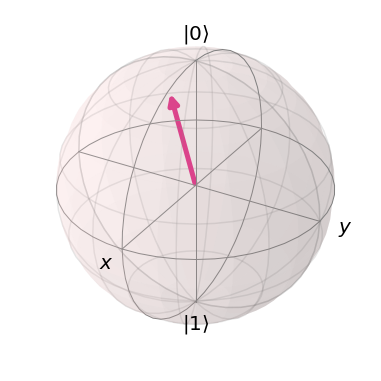

In [23]:
qc = QuantumCircuit(1,1)
qc.ry(pi*1/8,0)

plot_bloch_vector(get_bloch(qc))

## What next?

Now you know all about one qubit, you might want to learn about how many of them will be able to outperform even planet-sized supercomputers. If so, check out the [Qiskit Textbook](https://community.qiskit.org/textbook/). Chapter 1 starts off by giving a math-free taste of how quantum computers will work, and how qubits are unlike any variable in normal computers. Chapter 1 and Chapter 2 then go on to explain build up a mathematical description of qubits, which is then used in later chapters to explain how the devices can do useful things.

If you want to stick with few qubits and no maths, check out [this puzzle game](http://ibm.biz/hello-qiskit). It visualizes and explains the inner workings of two qubits.

For those who want to get started with actually doing something with quantum computing, even if it is with just one qubit, check out our single qubit hackathon using the link below.

[**Click here for the single qubit hackathon**]()